In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face.zip' -d '/content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face'

Archive:  /content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face.zip
   creating: /content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face/
  inflating: /content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face/.DS_Store  
   creating: /content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/__MACOSX/
   creating: /content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/__MACOSX/orl_face/
  inflating: /content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/__MACOSX/orl_face/._.DS_Store  
   creating: /content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face/u1/
  inflating: /content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face/u1/1.png  
   creating: /content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/__MACOSX/orl_face/u1/
  inflating: /content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/__MACOSX/orl_face/u1/._1.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/Day 8 Hom

<class 'numpy.ndarray'>
(112, 92)


(-0.5, 91.5, 111.5, -0.5)

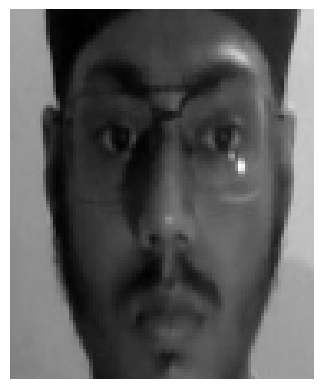

In [ ]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt

# access any single image
usr_name = 41
samp_no = 2

path = "/content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face/u%d/%d.png"%(usr_name,samp_no)

# read the image
im = mimg.imread(path)

print(type(im))
print(im.shape)

# display the image
plt.imshow(im,cmap='gray')
plt.axis('off')

Enter the user number:41


Text(0.5, 1.0, 'Query image')

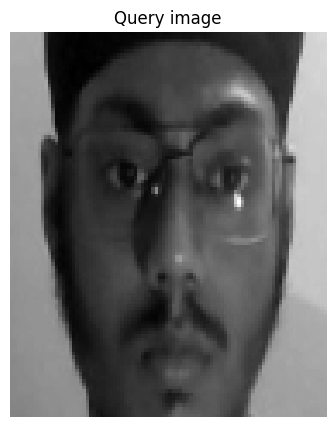

In [ ]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
import numpy as np

# load the query image
usrId = int(input("Enter the user number:"))
samp = np.random.randint(8,10) # selecting any random sample number
path = "/content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face/u%d/%d.png"%(usrId,samp)

im = mimg.imread(path)

plt.figure(1,(5,5))
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title("Query image")

In [ ]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
import numpy as np
tot_samples=410
data=np.zeros((tot_samples,im.shape[0]*im.shape[1]))
label=np.zeros((tot_samples))
# Change the shape of the images array to (410, 92, 112)
images=np.zeros((tot_samples, im.shape[0], im.shape[1]))
indx=-1
for i in range(1,42,1):
  for j in range(1,11,1):
    indx=indx+1
    usr_name=i
    samp_no=j
    path='/content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face/u%d/%d.png'%(usr_name,samp_no)
    im = mimg.imread(path)
    feat=im.reshape(1,-1)
    data[indx,:]=feat
    label[indx]=i
    # Transpose the im array before assigning it to images
    images[indx,:,:]= im  # Transpose im to match the shape of images slice
    print("user num ",i,'samp no',j,'processed...')

user num  1 samp no 1 processed...
user num  1 samp no 2 processed...
user num  1 samp no 3 processed...
user num  1 samp no 4 processed...
user num  1 samp no 5 processed...
user num  1 samp no 6 processed...
user num  1 samp no 7 processed...
user num  1 samp no 8 processed...
user num  1 samp no 9 processed...
user num  1 samp no 10 processed...
user num  2 samp no 1 processed...
user num  2 samp no 2 processed...
user num  2 samp no 3 processed...
user num  2 samp no 4 processed...
user num  2 samp no 5 processed...
user num  2 samp no 6 processed...
user num  2 samp no 7 processed...
user num  2 samp no 8 processed...
user num  2 samp no 9 processed...
user num  2 samp no 10 processed...
user num  3 samp no 1 processed...
user num  3 samp no 2 processed...
user num  3 samp no 3 processed...
user num  3 samp no 4 processed...
user num  3 samp no 5 processed...
user num  3 samp no 6 processed...
user num  3 samp no 7 processed...
user num  3 samp no 8 processed...
user num  3 samp n

In [ ]:
import pandas as pd
from sklearn import svm

X = data.copy()
y = label.copy()

#split the data into train and test
r = 0.3

Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    svm_model = svm_model.fit(Xtrain,ytrain)

    # predict the labels
    ypred = svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

print()

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
ResultDF

(287, 10304) (287,)
(123, 10304) (123,)
[[0.91869919 0.91869919 0.91869919]
 [0.93495935 0.93495935 0.93495935]
 [0.86178862 0.93495935 0.94308943]]



,C=1,C=2,C=3
poly,0.918699,0.918699,0.918699
linear,0.934959,0.934959,0.934959
rbf,0.861789,0.934959,0.943089


In [ ]:
import joblib
# final best model
# kernel function - linear , C =1

orl_svm_model = svm.SVC(kernel='linear',gamma='scale',C=1)
# train the model
orl_svm_model = orl_svm_model.fit(Xtrain,ytrain)

# save the trained model
joblib.dump(orl_svm_model,'/content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face.pkl')

['/content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face.pkl']

User id predicted is : 41


Text(0.5, 1.0, 'predicted user')

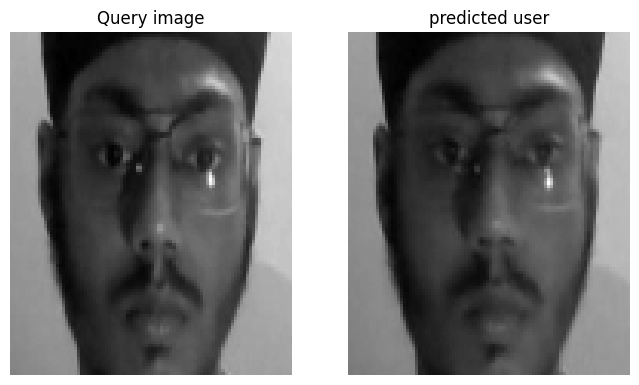

In [ ]:
import joblib
from sklearn import svm ,metrics
# calcualte the features of the query image
feat_query = im.reshape(1,-1)

# model path
path_model = '/content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face.pkl'
# load the trained model
face_model = joblib.load(path_model)


# predict the id of the query image
id = face_model.predict(feat_query)
print("User id predicted is :",int(id[0]))


path = "/content/drive/MyDrive/Colab Notebooks/Day 8 Homework/orl_face/orl_face/u%d/%d.png"%(id[0],1)

im_pred = mimg.imread(path)

plt.figure(1,(8,5))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title("Query image")

plt.subplot(1,2,2)
plt.imshow(im_pred,cmap='gray')
plt.axis('off')
plt.title("predicted user")